<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/rev3/S9/EVA4_S9_Quiz_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-23 20:50:31.131498


## 1. Loading Module and Models 

In [2]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!rm -rf EVA4
!git clone -b rev3 https://github.com/sujitojha1/EVA4 -q --quiet
print("Loaded EVA4 Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded EVA4 Modules and Models
     |████████████████████████████████| 634kB 10.2MB/s 



## 2. Loading train and test data with transforms and loader functions

In [3]:
from EVA4.Modules import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

  pip install torch-lr-finder -v --global-option="amp"


CUDA availability ? True


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [4]:
cifar10.data_summary_stats()
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified


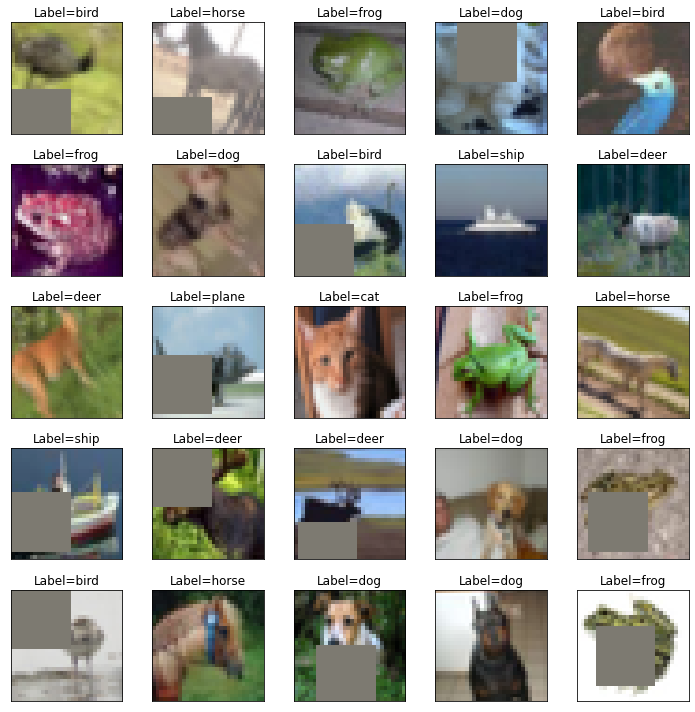

In [5]:
cifar10.sample_pictures(train_flag=True)

# The Model

In [6]:
from EVA4.Models import *

# Loading ResNet18 Model
net = DNN()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [7]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           3,584
       BatchNorm2d-2          [-1, 128, 32, 32]             256
              ReLU-3          [-1, 128, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          16,512
       BatchNorm2d-5          [-1, 128, 32, 32]             256
              ReLU-6          [-1, 128, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]         147,584
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]          16,512
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 128,

# Define a Loss function and optimizer

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)

# Training and Testing

In [9]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(16):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.2843225002288818 Batch_id=390 Accuracy=47.25: 100%|██████████| 391/391 [00:27<00:00, 14.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 4854/10000 (48.54%)


Epoch: 1


Loss=0.9532461166381836 Batch_id=390 Accuracy=59.71: 100%|██████████| 391/391 [00:27<00:00, 14.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0082, Accuracy: 6384/10000 (63.84%)


Epoch: 2


Loss=0.9745638966560364 Batch_id=390 Accuracy=65.42: 100%|██████████| 391/391 [00:28<00:00, 13.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 4176/10000 (41.76%)


Epoch: 3


Loss=1.0324970483779907 Batch_id=390 Accuracy=69.23: 100%|██████████| 391/391 [00:27<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 6655/10000 (66.55%)


Epoch: 4


Loss=0.8503689765930176 Batch_id=390 Accuracy=71.63: 100%|██████████| 391/391 [00:27<00:00, 14.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 6634/10000 (66.34%)


Epoch: 5


Loss=0.6144673228263855 Batch_id=390 Accuracy=73.47: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 5602/10000 (56.02%)


Epoch: 6


Loss=0.5842490196228027 Batch_id=390 Accuracy=75.08: 100%|██████████| 391/391 [00:27<00:00, 14.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 5994/10000 (59.94%)


Epoch: 7


Loss=0.6437427997589111 Batch_id=390 Accuracy=76.27: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0086, Accuracy: 6466/10000 (64.66%)


Epoch: 8


Loss=0.6401235461235046 Batch_id=390 Accuracy=77.35: 100%|██████████| 391/391 [00:27<00:00, 14.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0103, Accuracy: 6067/10000 (60.67%)


Epoch: 9


Loss=0.5071426033973694 Batch_id=390 Accuracy=78.16: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 6814/10000 (68.14%)


Epoch: 10


Loss=0.5025009512901306 Batch_id=390 Accuracy=79.02: 100%|██████████| 391/391 [00:27<00:00, 14.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 6612/10000 (66.12%)


Epoch: 11


Loss=0.5792201161384583 Batch_id=390 Accuracy=79.40: 100%|██████████| 391/391 [00:27<00:00, 13.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7935/10000 (79.35%)


Epoch: 12


Loss=0.5027313232421875 Batch_id=390 Accuracy=80.16: 100%|██████████| 391/391 [00:27<00:00, 14.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8037/10000 (80.37%)


Epoch: 13


Loss=0.6475309729576111 Batch_id=390 Accuracy=81.22: 100%|██████████| 391/391 [00:28<00:00, 13.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7800/10000 (78.00%)


Epoch: 14


Loss=0.6639971733093262 Batch_id=390 Accuracy=81.54: 100%|██████████| 391/391 [00:27<00:00, 13.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8079/10000 (80.79%)


Epoch: 15


Loss=0.4773164391517639 Batch_id=390 Accuracy=81.87: 100%|██████████| 391/391 [00:27<00:00, 14.01it/s]



Test set: Average loss: 0.0069, Accuracy: 7374/10000 (73.74%)

Finished Training


# display an image from the test set

Files already downloaded and verified


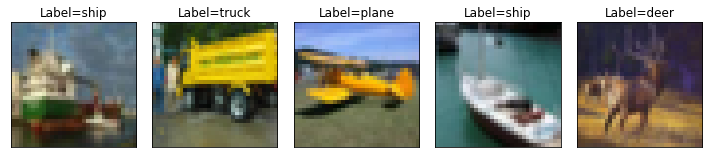

In [10]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

# Prediction of sampe test set

In [11]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   ship truck plane  ship  deer


# Plotting Train & Test Accuracy/Losses

Text(0.5, 1.0, 'Test Accuracy')

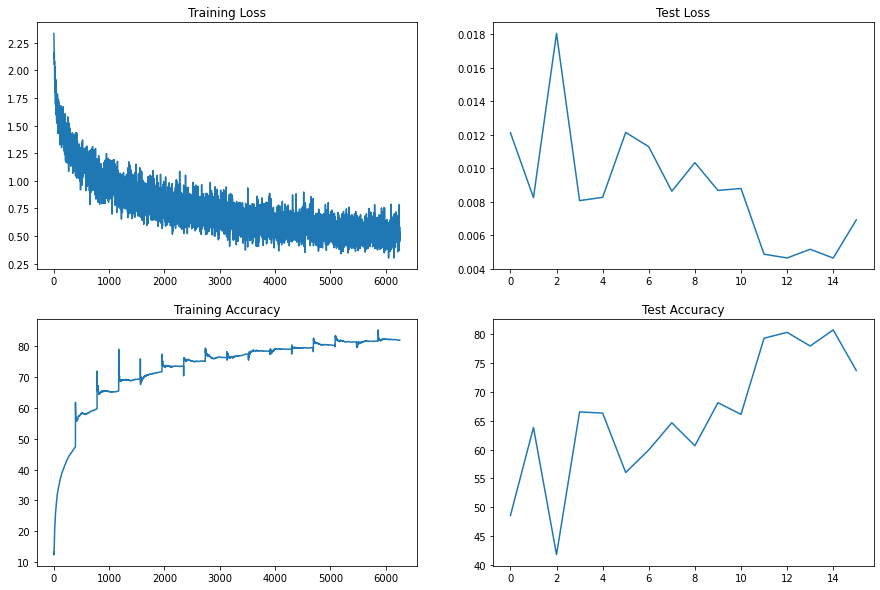

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test.test_acc)
axs[1, 1].set_title("Test Accuracy")

# Evaluating test Accuracy over different classes 

In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 100 %
Accuracy of  bird : 82 %
Accuracy of   cat : 68 %
Accuracy of  deer : 51 %
Accuracy of   dog : 88 %
Accuracy of  frog : 78 %
Accuracy of horse : 51 %
Accuracy of  ship : 68 %
Accuracy of truck : 45 %
